In [1]:
from MovieClustering import*
%matplotlib inline

In [4]:
dreload(MovieClustering.py)

NameError: name 'MovieClustering' is not defined

In [2]:
dataset,reducedDataset,centroids,clusterAssment = loadData()

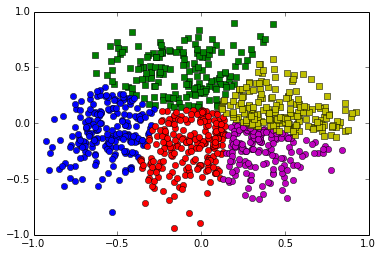

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
reduced_data = reducedDataset[:,2:]
reduced_data =  PCA(n_components=2).fit_transform(reduced_data)
printClusters(reduced_data)

In [26]:
# APPEL ALGO Genetique
reduced_data = reducedDataset[:,2:]
clust = Clustering(reduced_data,10)
clust.GA(10)
clusterAssment = clust.clusterAssment
centroids = clust.centroids

Meilleur genetique : 194.617506859


In [8]:
# APPEL ALGO DES K-moyennes

reduced_data = reducedDataset[:,2:]
clust = Clustering(reduced_data,10)
centroids, clusterAssment = clust.kMeans()
print clust.score
print clust.k



205.220988747
10


In [6]:
import time
users =  dataset.users
k = 20
j = 1
start_time = time.time()
recommandation(k,j,clusterAssment[j-1][0,0],users,reducedDataset,dataset,clusterAssment,centroids)
print "Temps d'exécution : %d secondes" % (time.time() - start_time)



 Nombre de personnes dans le cluster de l'utilisateur : 
221
Le vecteur de Gout de l'utilisateur cible est : 

[('Drama', 1.0), ('Romance', 0.58), ('Comedy', 0.36), ('Thriller', 0.36), ('Crime', 0.26), ('Action', 0.19), ('Children', 0.09), ('Mystery', 0.09), ('War', 0.07), ('Film-Noir', 0.05), ('Adventure', 0.04), ('Animation', 0.04), ('Horror', 0.03), ('Musical', 0.03), ('Sci-Fi', 0.03), ('unknown', 0.0), ('Documentary', 0.0), ('Fantasy', 0.0), ('Western', 0.0)]

 Les utilisateurs similaires a vous ont aime les films suivants  : 

 Nom : Big Squeeze, The (1996), id : 597, note : 5.000000  genre : [('Comedy', 1.0), ('Drama', 1.0)]
 Nom : Sophie's Choice (1982), id : 631, note : 5.000000  genre : [('Drama', 1.0)]
 Nom : Immortal Beloved (1994), id : 726, note : 4.800000  genre : [('Drama', 1.0), ('Romance', 1.0)]
 Nom : Ace Ventura: When Nature Calls (1995), id : 363, note : 4.750000  genre : [('Comedy', 1.0)]
 Nom : Jaws 2 (1978), id : 451, note : 4.750000  genre : [('Action', 1.0), (

In [9]:
import time
users =  dataset.users
k = 20
j = 1
start_time = time.time()
recommandation(k,j,clusterAssment[j-1][0,0],users,reducedDataset,dataset,clusterAssment,centroids,allC=True)
print "Temps d'exécution : %d secondes" % (time.time() - start_time)


 Nombre de personnes dans le cluster de l'utilisateur : 
942
Le vecteur de Gout de l'utilisateur cible est : 

[('Drama', 1.0), ('Romance', 0.58), ('Comedy', 0.36), ('Thriller', 0.36), ('Crime', 0.26), ('Action', 0.19), ('Children', 0.09), ('Mystery', 0.09), ('War', 0.07), ('Film-Noir', 0.05), ('Adventure', 0.04), ('Animation', 0.04), ('Horror', 0.03), ('Musical', 0.03), ('Sci-Fi', 0.03), ('unknown', 0.0), ('Documentary', 0.0), ('Fantasy', 0.0), ('Western', 0.0)]

 Les utilisateurs similaires a vous ont aime les films suivants  : 

 Nom : Wedding Singer, The (1998), id : 353, note : 4.750000  genre : [('Comedy', 1.0), ('Romance', 1.0)]
 Nom : Mother (1996), id : 320, note : 4.600000  genre : [('Comedy', 1.0)]
 Nom : Murder at 1600 (1997), id : 321, note : 4.500000  genre : [('Mystery', 1.0), ('Thriller', 1.0)]
 Nom : Critical Care (1997), id : 340, note : 4.500000  genre : [('Comedy', 1.0)]
 Nom : Four Weddings and a Funeral (1994), id : 69, note : 4.500000  genre : [('Comedy', 1.0), 

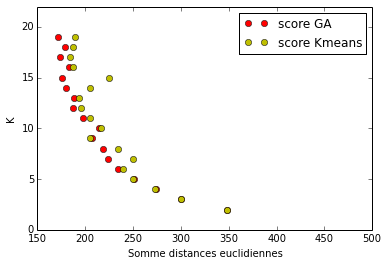

In [65]:
listValK = list(range(2,20))
red_dot, = plt.plot(resultOfCentroid, listValK, 'ro',label = "score GA")
yellow_dot, = plt.plot(resultOfCentroidKmean, listValK, 'yo', label = "score Kmeans")
plt.axis([150, 500, 0, 22])
plt.legend([red_dot,yellow_dot],["score GA","score Kmeans"])
plt.ylabel('K')
plt.xlabel('Somme distances euclidiennes ')
plt.show()

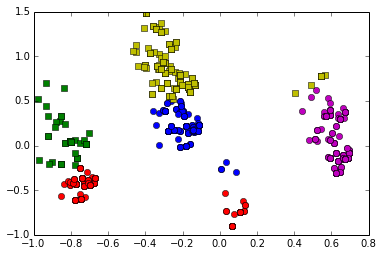

[[-0.8060077  -0.41113905]
 [-0.34032161  1.30357842]
 [-0.1588431   0.60255462]
 ..., 
 [ 0.62455099 -0.31059912]
 [-0.69656162 -0.43908311]
 [ 0.67125233 -0.15619308]]
Meilleur genetique : 778.329517367
776.447918233


In [20]:
from sklearn.decomposition import PCA
datasetFilms = []
for i in dataset.movies:
    datasetFilms.append(i.vecteur)

dataset_Films =  PCA(n_components=2).fit_transform(datasetFilms)
printClusters(numpy.array(dataset_Films))
print numpy.array(dataset_Films)
clust = Clustering(numpy.array(datasetFilms),20)
clust.GA(10)
clusterAssment = clust.clusterAssment
centroids = clust.centroids
print clust.score

In [21]:
import operator
idFilm = 70
print "vous avez aimé : " +  str(dataset.movies[idFilm].nom)
listeFilmsSimilaires = []
for i in range(len(clusterAssment)):
    dataset.movies[i].cluster = clusterAssment[i][0,0]
    if(clusterAssment[i][0,0] == clusterAssment[idFilm][0,0] and i!=idFilm):
        listeFilmsSimilaires.append(dataset.movies[i])

listeFilmsSimilaires = sorted(listeFilmsSimilaires, key=operator.attrgetter('avg'),reverse = True)
print "vous aimerez aussi : "

for i in range(0,5):
    if(i < len(listeFilmsSimilaires)):
        print listeFilmsSimilaires[i].nom


vous avez aimé : Lion King, The (1994)
vous aimerez aussi : 
Toy Story (1995)
Aladdin (1992)
Snow White and the Seven Dwarfs (1937)
Aristocats, The (1970)
Pinocchio (1940)


In [22]:
reduced_data = reducedDataset[:,0:1]
clusterUsers = Clustering(reduced_data,10)
clusterUsers.GA(10)
clusterAssmentUser = clusterUsers.clusterAssment
centroidsUser = clusterUsers.centroids

Meilleur genetique : 0.251377303622


In [25]:
import time
users =  dataset.users
k = 20
j = 20
idFilm = 1
print users[j-1].age
ClusterFilm = dataset.movies[idFilm].cluster
idFilm = idFilm
print "vous avez aimé : " + dataset.movies[idFilm].nom

start_time = time.time()
recommandation(k,j,clusterAssmentUser[j-1][0,0],users,reduced_data,dataset,clusterAssmentUser,centroidsUser,ClusterFilm = ClusterFilm,MovieId = idFilm )
print "Temps d'execution : %d secondes" % (time.time() - start_time)


42
vous avez aimé : GoldenEye (1995)

 Nombre de personnes dans le cluster de l'utilisateur : 
81

 Les utilisateurs similaires a vous ont aime les films suivants  : 

 Nom : Jaws 2 (1978), id : 451, note : 4.250000  genre : [('Action', 1.0), ('Horror', 1.0)]
 Nom : Jaws 3-D (1983), id : 452, note : 4.000000  genre : [('Action', 1.0), ('Horror', 1.0)]
 Nom : Fugitive, The (1993), id : 78, note : 4.000000  genre : [('Action', 1.0), ('Thriller', 1.0)]
 Nom : Crow, The (1994), id : 67, note : 3.833333  genre : [('Action', 1.0), ('Romance', 1.0), ('Thriller', 1.0)]
 Nom : Jaws (1975), id : 233, note : 3.750000  genre : [('Action', 1.0), ('Horror', 1.0)]
 Nom : Striking Distance (1993), id : 396, note : 3.666667  genre : [('Action', 1.0)]
 Nom : Outbreak (1995), id : 53, note : 3.500000  genre : [('Action', 1.0), ('Drama', 1.0), ('Thriller', 1.0)]
 Nom : GoldenEye (1995), id : 1, note : 3.428571  genre : [('Action', 1.0), ('Adventure', 1.0), ('Thriller', 1.0)]
 Nom : Mighty Morphin Power Ra

In [29]:
# import os
# dataGout = reducedDataset[:,2:]
# clustGout = Clustering(dataGout,10)
# clustGout.GA(10)
centroidsGout, clusterAssmentGout = clustGout.centroids, clustGout.clusterAssment
users =  dataset.users

k = 5
err1 = numpy.zeros(100)
err2 = numpy.zeros(100)

currentPath =getOsPath()  
FileNotes = currentPath  + "/data/u1.test"

file_object = open(FileNotes, 'r')
corpus = file_object.readlines()
file_object.close()
notes = []
for j in range(len(corpus)):
	note = corpus[j].replace('\n','')
	m = note.split('\t')
	notes.append(Notes(m[0],m[1],m[2],m[3]))
    
for j in range(1,100):
	start_time = time.time()
	recommandation(k,j,clusterAssmentGout[j-1][0,0],users,dataGout,dataset,clusterAssmentGout,centroidsGout)
	print "Temps d'execution : %d secondes" % (time.time() - start_time),j
	err1[j-1] = testErreur(j,dataset,notes)




 Nombre de personnes dans le cluster de l'utilisateur : 
189
Le vecteur de Gout de l'utilisateur cible est : 

[('Drama', 1.0), ('Romance', 0.58), ('Comedy', 0.36), ('Thriller', 0.36), ('Crime', 0.26), ('Action', 0.19), ('Children', 0.09), ('Mystery', 0.09), ('War', 0.07), ('Film-Noir', 0.05), ('Adventure', 0.04), ('Animation', 0.04), ('Horror', 0.03), ('Musical', 0.03), ('Sci-Fi', 0.03), ('unknown', 0.0), ('Documentary', 0.0), ('Fantasy', 0.0), ('Western', 0.0)]

 Les utilisateurs similaires a vous ont aime les films suivants  : 

 Nom : Mighty Aphrodite (1995), id : 12, note : 5.000000  genre : [('Comedy', 1.0)]
 Nom : Heavy Metal (1981), id : 100, note : 5.000000  genre : [('Action', 1.0), ('Adventure', 1.0), ('Animation', 1.0), ('Horror', 1.0), ('Sci-Fi', 1.0)]
 Nom : Forbidden Planet (1956), id : 433, note : 5.000000  genre : [('Sci-Fi', 1.0)]
 Nom : Night on Earth (1991), id : 855, note : 5.000000  genre : [('Comedy', 1.0), ('Drama', 1.0)]
 Nom : Reality Bites (1994), id : 1073,

In [30]:
print "RMSE : " + str(numpy.mean(err1))

RMSE : 1.1948558027


In [5]:
for j in range(1,100):
	start_time = time.time()
	recommandation(k,j,clusterAssmentGout[j-1][0,0],users,dataGout,dataset,clusterAssmentGout,centroidsGout,allC = True)
	print "Temps d'execution : %d secondes" % (time.time() - start_time),j
	err2[j-1] = testErreur(j,dataset,notes)


 Nombre de personnes dans le cluster de l'utilisateur : 
942
Le vecteur de Gout de l'utilisateur cible est : 

[('Drama', 1.0), ('Romance', 0.58), ('Comedy', 0.36), ('Thriller', 0.36), ('Crime', 0.26), ('Action', 0.19), ('Children', 0.09), ('Mystery', 0.09), ('War', 0.07), ('Film-Noir', 0.05), ('Adventure', 0.04), ('Animation', 0.04), ('Horror', 0.03), ('Musical', 0.03), ('Sci-Fi', 0.03), ('unknown', 0.0), ('Documentary', 0.0), ('Fantasy', 0.0), ('Western', 0.0)]

 Les utilisateurs similaires a vous ont aime les films suivants  : 

 Nom : Mother (1996), id : 320, note : 5.000000  genre : [('Comedy', 1.0)]
 Nom : Murder at 1600 (1997), id : 321, note : 5.000000  genre : [('Mystery', 1.0), ('Thriller', 1.0)]
 Nom : Critical Care (1997), id : 340, note : 5.000000  genre : [('Comedy', 1.0)]
 Nom : Wag the Dog (1997), id : 346, note : 5.000000  genre : [('Comedy', 1.0), ('Drama', 1.0)]
 Nom : Desperate Measures (1998), id : 347, note : 5.000000  genre : [('Crime', 1.0), ('Drama', 1.0), ('T

In [6]:
print "RMSE : " + str(numpy.mean(err2))

RMSE : 1.3362511233
